In [4]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from ipywidgets import interact, SelectionSlider, Layout, Output

In [2]:
labels = ['L2 Inhib', 'L5 Inhib', 'L2 Prob']

dpl_data = np.load('../data/grid_sweep/dpl_sim_uniform.npy')
theta_samples = np.load('../data/grid_sweep/theta_sim_uniform.npy')


n_sims, n_params = theta_samples.shape
param_values = [np.unique(theta_samples[:, idx]) for idx in range(n_params)]
lookup_dict = {tuple(theta_samples[idx,:]): idx for idx in range(n_sims)}

slider_dict = {f'p{idx}': SelectionSlider(options=param_values[idx],
               description=labels[idx], style={'description_width': '150px'},
               layout=Layout(width='500px')) for 
               idx in range(len(param_values))}


interactive(children=(SelectionSlider(description='L2 Inhib', layout=Layout(width='500px'), options=(1e-10, 0.…

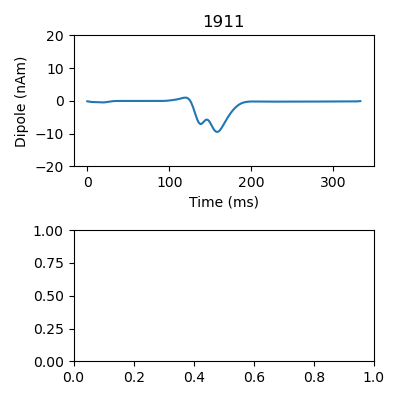

In [7]:
%matplotlib widget

fig, axes = plt.subplots(2, 1, figsize=(4,4), tight_layout=True)

@interact(**slider_dict)
def plot_dipole(p0, p1, p2):
    idx = lookup_dict[(p0, p1, p2)]
    for line in axes[0].get_lines(): # ax.lines:
        line.remove()
    axes[0].plot(dpl_data[idx,:])
    axes[0].set_ylabel('Dipole (nAm)')
    axes[0].set_xlabel('Time (ms)')
    axes[0].set_ylim([-20, 20])
    axes[0].set_title(idx)


